**Brian Blaylock**  
*July 20, 2021*

# GFS Data
The product names are not as simple as the HRRR dataset, but we can still get GFS data.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools_OLD import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie('2021-07-11', 
           model='gfs', 
           product='pgrb2.0p25')

🏋🏻‍♂️ Found 2021-Jul-11 00:00 UTC F00 [GFS] [product=pgrb2.0p25] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
H.SOURCES

{'aws': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'google': 'https://storage.googleapis.com/global-forecast-system/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'azure': 'https://noaagfs.blob.core.windows.net/gfs/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000'}

In [4]:
x = H.xarray('^TMP:2 m above')

📇 Download subset: [GFS] model [pgrb2.0p25] product run at 2021-Jul-11 00:00 UTC F00                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000
   1: GRIB_message=580 TMP:2 m above ground:anl


Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

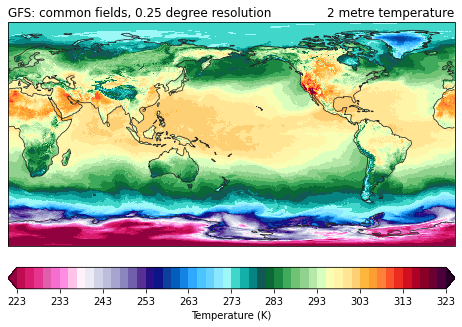

In [5]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

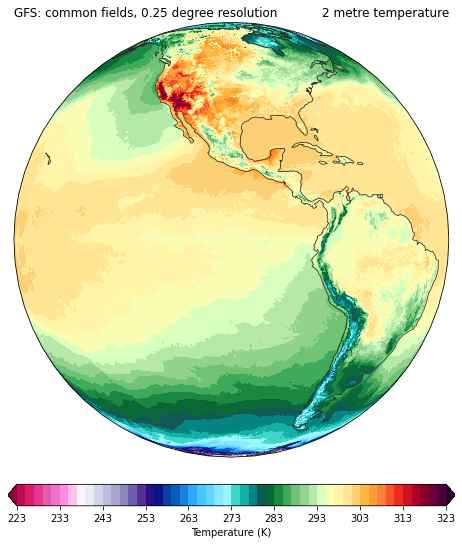

In [10]:
ax = common_features(crs=ccrs.Geostationary(central_longitude=-100), figsize=[10,10])

p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05, shrink=.8,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

## Get data from the GFS wave output

In [2]:
H = Herbie('2021-07-11', 
           model='gfs_wave')

/p/home/blaylock/BB_python/HRRR_archive_download/herbie/archive.py:199: UserWarning: `product` not specified. Will use ["arctic.9km"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Jul-11 00:00 UTC F00 [GFS_WAVE] [product=arctic.9km] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
H.read_idx()

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,430316,0-430316,2021-07-11,2021-07-11,WIND,surface,anl
2.0,430316,1049180,430316-1049180,2021-07-11,2021-07-11,WDIR,surface,anl
3.0,1049180,1480559,1049180-1480559,2021-07-11,2021-07-11,UGRD,surface,anl
4.0,1480559,1908977,1480559-1908977,2021-07-11,2021-07-11,VGRD,surface,anl
5.0,1908977,2174766,1908977-2174766,2021-07-11,2021-07-11,HTSGW,surface,anl
6.0,2174766,2497196,2174766-2497196,2021-07-11,2021-07-11,PERPW,surface,anl
7.0,2497196,3016885,2497196-3016885,2021-07-11,2021-07-11,DIRPW,surface,anl
8.0,3016885,3260189,3016885-3260189,2021-07-11,2021-07-11,WVHGT,surface,anl
9.0,3260189,3529930,3260189-3529930,2021-07-11,2021-07-11,SWELL,1 in sequence,anl


In [4]:
x = H.xarray('SWELL:1 in sequence')

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/gfs_wave/20210711]
📇 Download subset: [GFS_WAVE] model [arctic.9km] product run at 2021-Jul-11 00:00 UTC F00                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/wave/gridded/gfswave.t00z.arctic.9km.f000.grib2
   1: GRIB_message=9   SWELL:1 in sequence:anl


ecCodes provides no latitudes/longitudes for gridType='polar_stereographic'


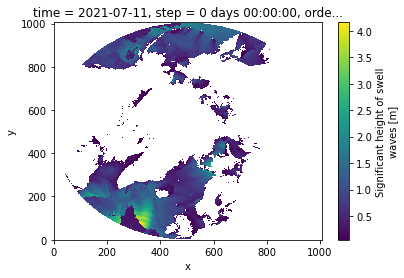

In [6]:
x.swell.plot()

In [8]:
x.herbie.crs